In [ ]:
from plots import make_heatmap_animation
data_dir = "data/wave/20210712-161608/processed_data.npz"
p_mat_list = 
make_heatmap_animation(p_mat_list, data_dir)

In [1]:
from data import load_data
from data import get_p_mat_list
wave_data_dir = "data/wave/20210712-161608"
import numpy as np

# TODO: This is bad
tf = 5
dt = 0.002
T = int(tf / dt) + 1

x,y,p,u,v = load_data(wave_data_dir + "/dumps/dump000.npz")
slice_size = len(x)

x_all, y_all, p_all, u_all, v_all = [np.zeros((T, slice_size)) for i in range(5)]
t_all = np.zeros(T)

for i in range(T): 
    dump_file = wave_data_dir + "/dumps/dump{:03d}.npz".format(i)
    x,y,p,u,v = load_data(dump_file)
    x_all[i, :] = x
    y_all[i, :] = y
    p_all[i, :] = p
    u_all[i, :] = u
    v_all[i, :] = v
    t_all[i] = dt * i
    if i % 100 == 0:
        print(f"Loaded dump file {i}. Now {(i / T) * 100 : .0f}% complete")

print("Finished loading data.")

p_mat_list = get_p_mat_list(p_all, x_all, y_all)

Loaded dump file 0. Now  0.000% complete
Loaded dump file 100. Now  0.040% complete
Loaded dump file 200. Now  0.080% complete
Loaded dump file 300. Now  0.120% complete
Loaded dump file 400. Now  0.160% complete
Loaded dump file 500. Now  0.200% complete
Loaded dump file 600. Now  0.240% complete
Loaded dump file 700. Now  0.280% complete
Loaded dump file 800. Now  0.320% complete
Loaded dump file 900. Now  0.360% complete
Loaded dump file 1000. Now  0.400% complete
Loaded dump file 1100. Now  0.440% complete
Loaded dump file 1200. Now  0.480% complete
Loaded dump file 1300. Now  0.520% complete
Loaded dump file 1400. Now  0.560% complete
Loaded dump file 1500. Now  0.600% complete
Loaded dump file 1600. Now  0.640% complete
Loaded dump file 1700. Now  0.680% complete
Loaded dump file 1800. Now  0.720% complete
Loaded dump file 1900. Now  0.760% complete
Loaded dump file 2000. Now  0.800% complete
Loaded dump file 2100. Now  0.840% complete
Loaded dump file 2200. Now  0.880% complete


IndexError: index 100 is out of bounds for axis 0 with size 100

In [24]:
# p_all, x, y -> p_mat_list
x = x_all[0]
y = y_all[0]
x

array([0.        , 0.01      , 0.02      , ..., 0.98000002, 0.99000001,
       1.        ])

In [21]:
from helpers import get_delta, point_to_index, get_p_mat, make_empty_list_matrix

def get_p_mat(p, x, y, dx, dy, x_min, y_min, N, M):
    p_mat = make_empty_list_matrix(N,M)

    for x0,y0,p0 in zip(x,y,p):
        # x,y -> n,m
        n = point_to_index(x0, dx, x_min)
        m = point_to_index(y0, dy, y_min)
        n = min(n, N-1)
        m = min(m, M-1)
        # 
        p_mat[n,m].append(p0)

    avg = np.vectorize(lambda l: sum(l) / len(l))
    p_mat = avg(p_mat)

    return p_mat


def get_p_mat_simple(p, x, y):
	'''
	Converts vectors p, x, y into matrix p_mat.
	'''
	dx, x_min, x_max = get_delta(x)
	dy, y_min, y_max = get_delta(y)
	N = point_to_index(x_max, dx, x_min)
	M = point_to_index(y_max, dy, y_min)
	p_mat = get_p_mat(p, x, y, dx, dy, x_min, y_min, N, M)
	return p_mat

def get_p_mat_list(p_all, x_all, y_all):
    p_mat_list = []
    T = len(p_all)
    for t, (p, x, y) in enumerate(zip(p_all, x_all, y_all)):
        if t % 10 == 0:
            print(f"Generated p_mat {t}. Now {(t / T) * 100 : .0f}% complete")
        p_mat = get_p_mat_simple(p, x, y)
        p_mat_list.append(p_mat)
    return p_mat_list

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import animation

def make_heatmap_animation(mat_list, save_dir):
    fig = plt.figure()
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    def animate(i):
        sns.heatmap(mat_list[i],  vmin = -3, vmax= 3, square=True, cbar=False, center=0.00, cmap=cmap)
        # plt.clf()
        # plt.close()

    anim = animation.FuncAnimation(fig, animate, frames=len(mat_list), repeat = False)

    savefile = save_dir + "/test.gif"
    pillowwriter = animation.PillowWriter(fps=5)
    anim.save(savefile, writer=pillowwriter)

In [22]:
p_mat_list = get_p_mat_list(p_all[:10], x_all[:10], y_all[:10])

Generated p_mat 0. Now  0% complete
Generated p_mat 5. Now  50% complete


In [23]:
p_mat_list = get_p_mat_list(p_all, x_all, y_all)

Generated p_mat 0. Now  0% complete
Generated p_mat 5. Now  0% complete
Generated p_mat 10. Now  0% complete
Generated p_mat 15. Now  1% complete
Generated p_mat 20. Now  1% complete
Generated p_mat 25. Now  1% complete
Generated p_mat 30. Now  1% complete
Generated p_mat 35. Now  1% complete
Generated p_mat 40. Now  2% complete
Generated p_mat 45. Now  2% complete
Generated p_mat 50. Now  2% complete
Generated p_mat 55. Now  2% complete
Generated p_mat 60. Now  2% complete
Generated p_mat 65. Now  3% complete
Generated p_mat 70. Now  3% complete
Generated p_mat 75. Now  3% complete
Generated p_mat 80. Now  3% complete
Generated p_mat 85. Now  3% complete
Generated p_mat 90. Now  4% complete
Generated p_mat 95. Now  4% complete
Generated p_mat 100. Now  4% complete
Generated p_mat 105. Now  4% complete
Generated p_mat 110. Now  4% complete
Generated p_mat 115. Now  5% complete
Generated p_mat 120. Now  5% complete
Generated p_mat 125. Now  5% complete
Generated p_mat 130. Now  5% compl

Animating frame 0. Now  0% complete.
Animating frame 0. Now  0% complete.
Animating frame 1. Now  0% complete.
Animating frame 2. Now  1% complete.
Animating frame 3. Now  1% complete.
Animating frame 4. Now  2% complete.
Animating frame 5. Now  2% complete.
Animating frame 6. Now  2% complete.
Animating frame 7. Now  3% complete.
Animating frame 8. Now  3% complete.
Animating frame 9. Now  4% complete.
Animating frame 10. Now  4% complete.
Animating frame 11. Now  4% complete.
Animating frame 12. Now  5% complete.
Animating frame 13. Now  5% complete.
Animating frame 14. Now  6% complete.
Animating frame 15. Now  6% complete.
Animating frame 16. Now  6% complete.
Animating frame 17. Now  7% complete.
Animating frame 18. Now  7% complete.
Animating frame 19. Now  8% complete.
Animating frame 20. Now  8% complete.
Animating frame 21. Now  8% complete.
Animating frame 22. Now  9% complete.
Animating frame 23. Now  9% complete.
Animating frame 24. Now  10% complete.
Animating frame 25. No

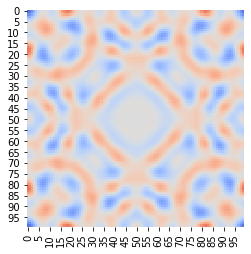

In [28]:
def make_heatmap_animation(mat_list, save_dir):
    fig = plt.figure()
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    def animate(i):
        print(f"Animating frame {i}. Now {i/len(mat_list) * 100 : .0f}% complete.")
        sns.heatmap(mat_list[i],  vmin = -3, vmax= 3, square=True, cbar=False, center=0.00, cmap=cmap)
        # plt.clf()
        # plt.close()

    anim = animation.FuncAnimation(fig, animate, frames=len(mat_list), repeat = False)

    savefile = save_dir + "/heatmap.gif"
    pillowwriter = animation.PillowWriter(fps=5)
    anim.save(savefile, writer=pillowwriter)
abc = p_mat_list[::10]
make_heatmap_animation(abc, save_dir=wave_data_dir)